In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

mpl.style.use('ggplot')

In [6]:
data_file = "Canada.xlsx"

df = pd.read_excel(
    data_file,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

column_names = df.columns.tolist()

n_rows, n_cols = df.shape

# AXIS = 1 ARE THE COLUMNS!! AXIS = 0 ARE THE ROWS
# df.drop(['DEV', 'REG', 1980], axis=1, inplace=True) # this is fine
df.drop(['DEV', 'REG', 'AREA', 'DevName'], axis=1, inplace=True) # drop useless dimensions
# df.drop([0, 1, 2], axis = 0, inplace=True) #drop useless rows

df["Total"] = df[np.arange(1980,2013,1)].sum(axis = 1)
df["Total_90s"] = df[range(1990,1999)].sum(axis = 1) # sum along the y axis = along the columns !
Total_of_totals = df['Total'].sum(axis = 0)


df.set_index("OdName", inplace=True)
df.loc["Japan"] # access the specific row

Total_japan_90s = df.loc["Japan", range(1990,1999)].sum(axis = 0)

# filter the rows of a dataframe
df[(df["AreaName"] == "Asia") & (df["RegName"] == "Western Asia")]

# sort a dataframe
sorted_by_total_df = df.sort_values(by = "Total", axis = 0, ascending = False, inplace=False)

In [29]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest.csv")
#take area, poptotal, popdensity
a = midwest.query('(area > 0.070 & poptotal > 1000) | area < 0.01')
avg1 = midwest['area'].sum(axis=0) / midwest.shape[0]
avg2 = midwest['area'].mean()
avg1 == avg2

True

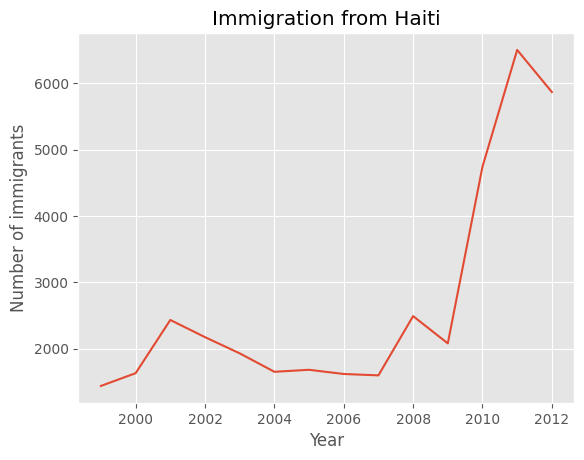

In [3]:
fig, ax = plt.subplots()
ax.plot(df.loc["Haiti", range(1999,2013)])

plt.title("Immigration from Haiti")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")


plt.show()

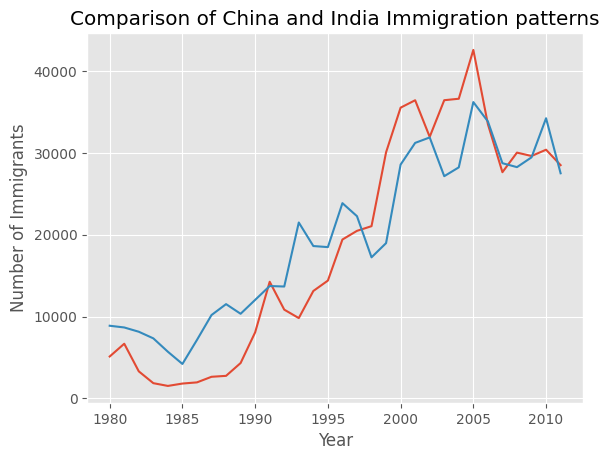

In [4]:
fig, ax = plt.subplots()
ax.plot(df.loc["China", range(1980,2012)])
ax.plot(df.loc["India", range(1980,2012)])

plt.title("Comparison of China and India Immigration patterns")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.show()

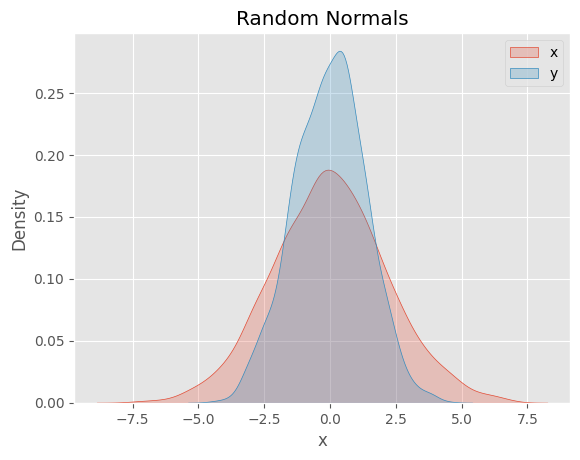

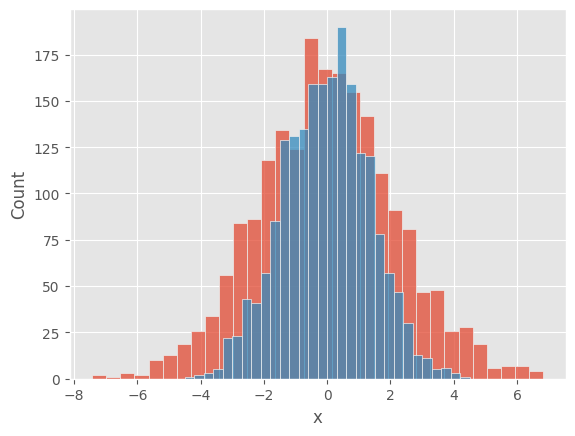

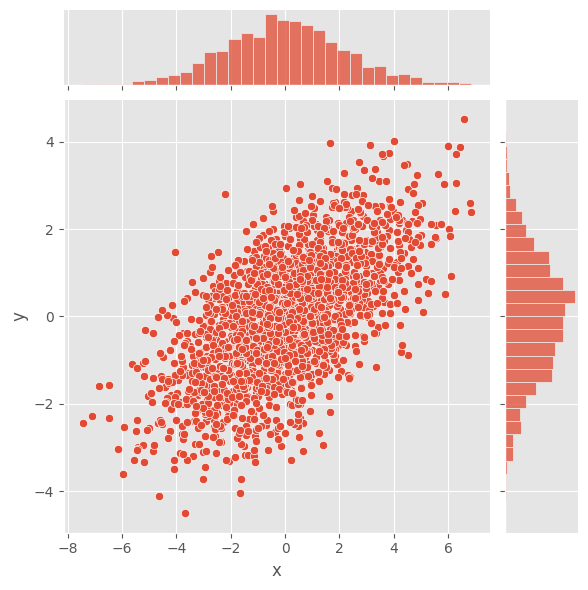

In [5]:
df = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
df = pd.DataFrame(df, columns=['x', 'y'])

for col in 'xy':
    sns.kdeplot(df[col], fill=True, label=col )
    
plt.title("Random Normals")
plt.legend()
plt.show()

sns.histplot(df["x"])
sns.histplot(df["y"])
plt.show()

# for marginal distributions
sns.jointplot(df, x="x", y="y")
plt.show()

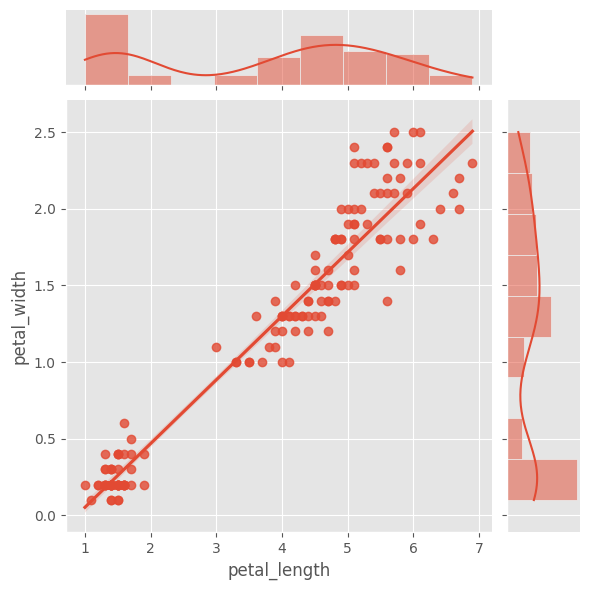

In [118]:
iris = sns.load_dataset("iris")
sns.jointplot(iris, x="petal_length", y="petal_width", kind="reg")
plt.show()

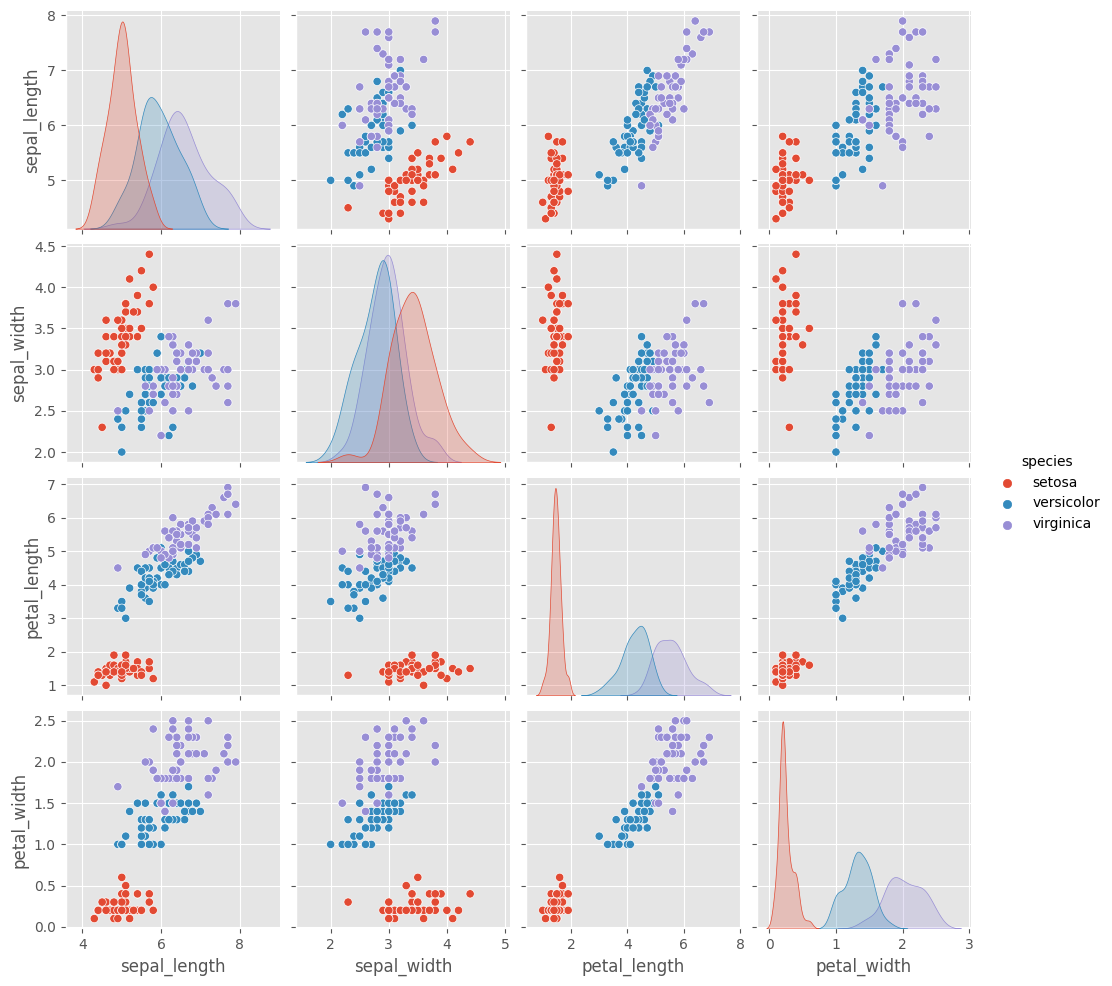

In [115]:
sns.pairplot(iris, hue="species")
plt.show()

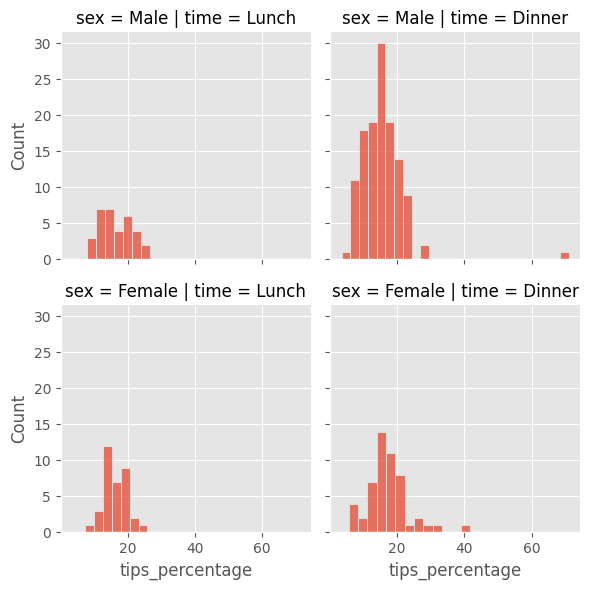

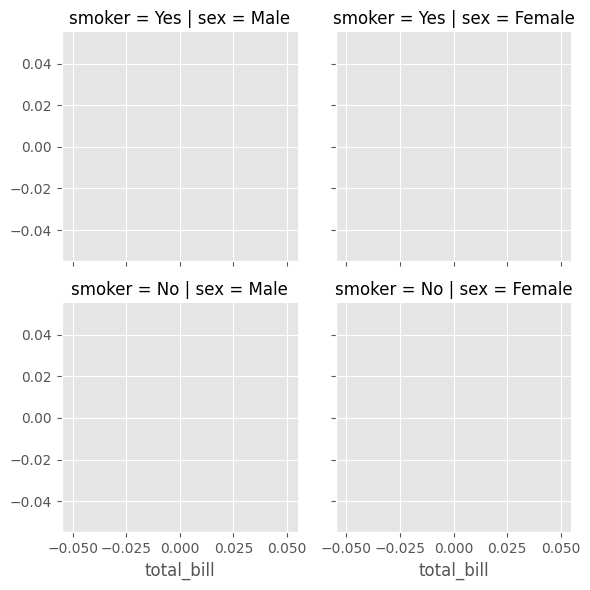

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [129]:
tips = sns.load_dataset('tips')

tips["tips_percentage"] = 100 * tips["tip"] / tips["total_bill"]
grid = sns.FacetGrid(tips, row="sex", col='time')
grid.map(sns.histplot, "tips_percentage")
plt.show()

grid = sns.FacetGrid(tips, col="sex", row="smoker")
grid.map(sns.scatterplot, "total_bill")
plt.show()

tips

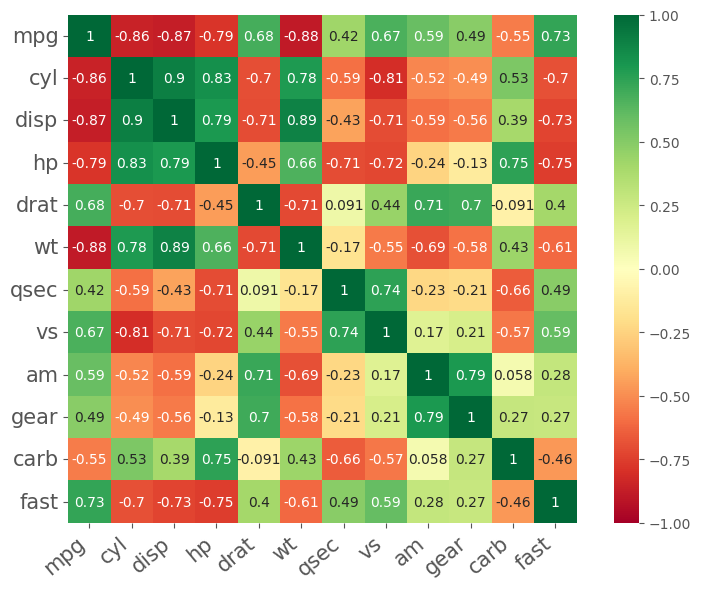

In [49]:
cars = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
car_correlation = cars.corr(method='pearson', numeric_only=True)
car_correlation


fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(car_correlation, annot=True, ax=ax,
           vmin = -1, vmax=1,
           cmap="RdYlGn",
           square=True)


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center', fontsize=15)

plt.tight_layout()
plt.show()

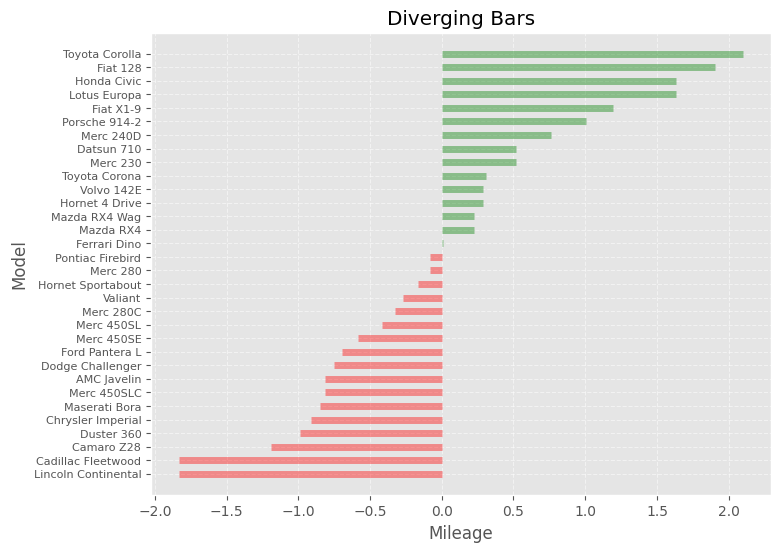

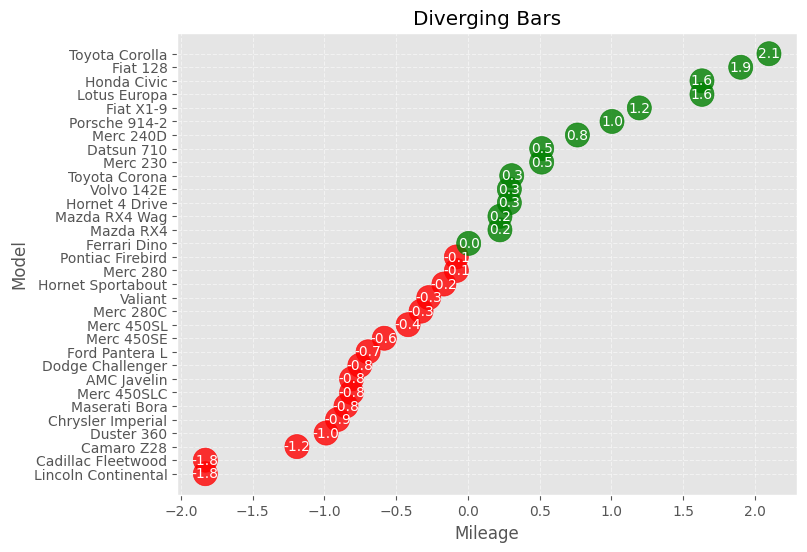

In [144]:
#center the df
cars['mpg_center'] = (cars['mpg'] - cars['mpg'].mean())/ cars['mpg'].std()

cars['color'] = ['green' if x >= cars['mpg_center'].mean() else 'red' for x in cars['mpg_center']]
cars.sort_values(by='mpg_center', inplace=True)

plt.figure(figsize=(8, 6))
# draw bars as thick horizontal lines
plt.hlines(y=cars.index, xmin=0, xmax=cars.mpg_center, color=cars.color, alpha=0.4, linewidth=5)

# decorate
plt.yticks(cars.index, cars.carname, fontsize=8)
plt.grid(linestyle='--', alpha=0.5)
plt.gca().set(xlabel='Mileage',
              ylabel='Model',
              title='Diverging Bars')
plt.show()

plt.figure(figsize=(8, 6))

plt.scatter(x = cars.mpg_center, y = cars['carname'] , color=cars.color, s=300, alpha=.8)
for x, y, tex in zip(cars.mpg_center, cars.index, cars.mpg_center):
    t = plt.text(x, y, round(tex, 1), ha='center', 
                 va='center',
                 color= 'white',
                )

plt.grid(linestyle='--', alpha=0.5)
plt.gca().set(xlabel='Mileage',
              ylabel='Model',
              title='Diverging Bars')

plt.show()

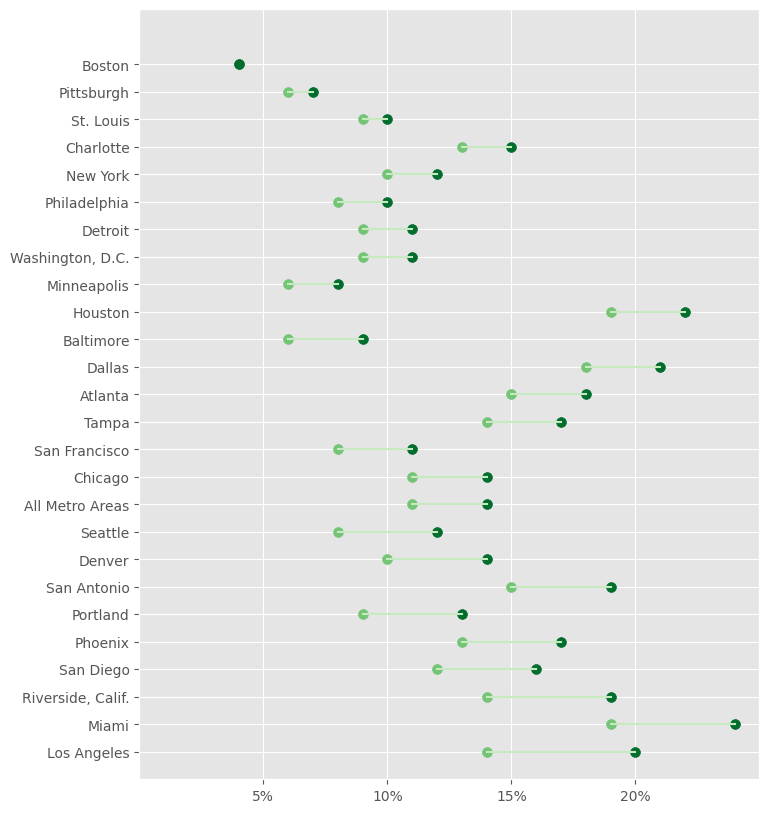

In [200]:
health = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")

#plot incremento percentuale
health['diff'] = health.pct_2013-health.pct_2014
health.sort_values(by='diff', ascending=False, inplace=True)
health.reset_index(inplace=True)
#Area, pct_2013, pct_2014m diff

#plt.figure(figsize=(10,8))
#plt.scatter(y=health.Area, x=health.pct_2014)
#plt.scatter(y=health.Area, x=health.pct_2013)

fig, ax = plt.subplots(figsize=(8,10))

ax.scatter(y=health.Area, x=health.pct_2014, s=50, color="#74c476")
ax.scatter(y=health.Area, x=health.pct_2013, s=50, color="#006d2c")

for (i, p1, p2) in zip(range(0, health.shape[0]),health['pct_2014'], health['pct_2013']):
    p1 = [p1, i]
    p2= [p2,i]
    plt.gca().add_line( mpl.lines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color="#c7e9c0"))
    
ax.set(xlim=(0, .25), ylim=(-1, 27), ylabel='')
ax.set_xticks([.05, .1, .15, .20])
plt.gca().set_xticklabels(['5%', '10%', '15%', '20%'])

plt.show()

['2seater (5)', 'compact (47)', 'midsize (41)', 'minivan (11)', 'pickup (33)', 'subcompact (35)', 'suv (62)']


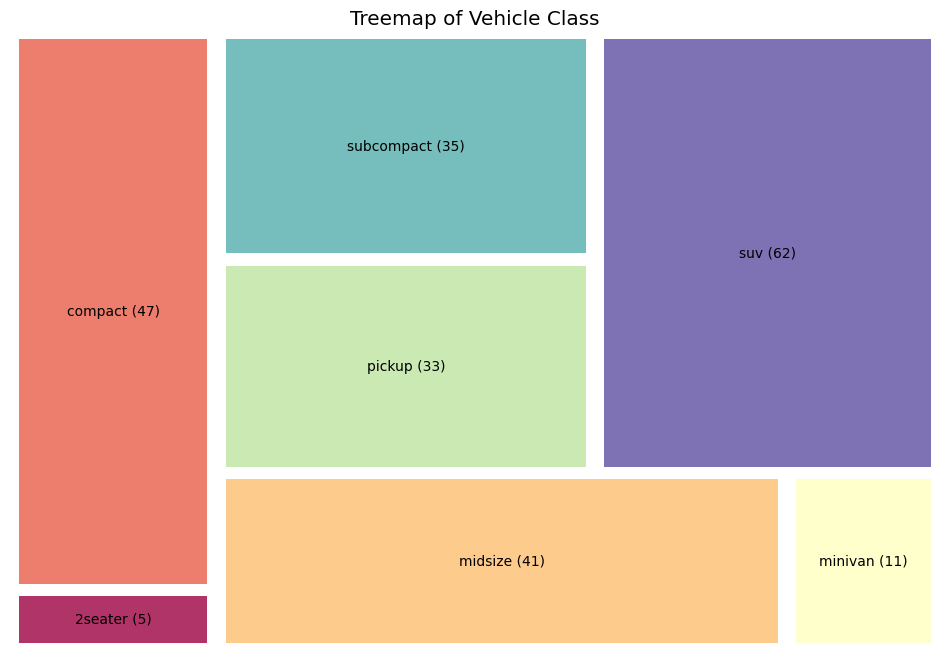

In [250]:
import squarify

mpg = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
mpg_grouped = mpg.groupby("class").count()

ncat = mpg_grouped.shape[0]
mpg_grouped.drop(columns=mpg_grouped.columns.tolist()[1:], inplace=True)
mpg_grouped.rename(columns={"manufacturer":"count"}, inplace=True)
mpg_grouped


colors = [plt.cm.Spectral(i/(ncat-1)) for i in range(ncat)]
# draw plot
plt.figure(figsize=(12, 8))
labels = mpg_grouped.index.tolist()
for i in range(0,len(labels)):
    labels[i] = f"{labels[i]} ({mpg_grouped.loc[labels[i]]['count']})"
print(labels)
squarify.plot(sizes=mpg_grouped['count'].tolist(), label=labels, color=colors, alpha=0.8, pad=True)

# decorate
plt.title("Treemap of Vehicle Class")
plt.axis("off")
plt.show()

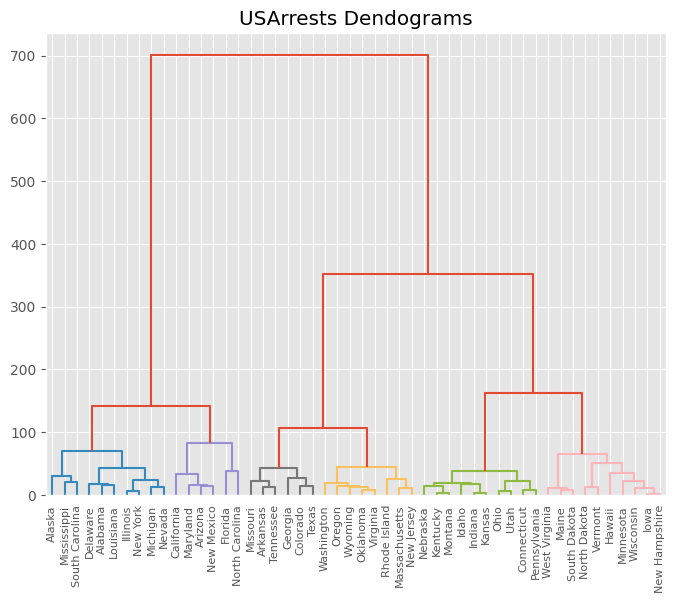

In [253]:
arrests = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')
arrests
#index 0,1,2,3...   , Murder, Assault, UrbanPop, Rape, State
import scipy.cluster.hierarchy as shc

df = arrests.copy()

# hierarchical clustering (returns a linkage matrix as numpy array)
hc = shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward')

# plot dendrogram
plt.figure(figsize=(8, 6))
dend = shc.dendrogram(hc,
                      labels=df.State.values,
                      color_threshold=100)
plt.title("USArrests Dendograms")
# plt.xticks(fontsize=10)
plt.show()